In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [28]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf, 
        out_file = 'iris_tree.dot',
        feature_names = iris.feature_names[2:],
        class_names = iris.target_names,
        rounded = True, 
        filled = True
)

In [35]:
# Class probabilities are calculated by just using the ratios 
# of the class frequenceies in the end node 

tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [36]:
tree_clf.predict([[5, 1.5]])

array([1])

<em> The CART algorithm is a greedy algorithm: it greedily
searches for an optimum split at the top level, then repeats the
process at each level. It does not check whether or not the split will
lead to the lowest possible impurity several levels down. A greedy
algorithm often produces a reasonably good solution, but it is not
guaranteed to be the optimal solution.

### Decision tree regression

In [53]:
X = 6 + np.random.randn(500)
y = 3 - 4*X + 2*(X**2) + 7 * np.random.randn(500)

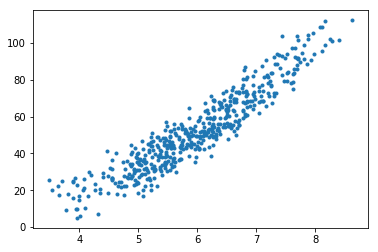

In [56]:
plt.scatter(X, y, marker='.')
plt.show()

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)

tree_reg.fit(X.reshape(-1, 1), y.reshape(-1, 1))

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [64]:
export_graphviz(
        tree_reg, 
        out_file = 'poly_tree.dot',
        rounded = True, 
        filled = True
)

In [65]:
from sklearn.metrics import r2_score

In [68]:
r2_score(y, tree_reg.predict(X.reshape(-1, 1)))

0.8238023438747282